In [ ]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import database
from snowballing.operations import reload, work_by_varname, load_work_map_all_years
from snowballing.snowballing import snowballing, create_provenance, log_to_provn
reload()


In [2]:
def busca(*libraries, seed=None, filter_function=None):
    filter_function = filter_function or (lambda x: x.category in ("snowball",))
    if seed is not None:
        iterable = ((1, work_by_varname(x)) for x in seed)
    else:
        iterable = load_work_map_all_years()
    seedset = set()
    for _, work in iterable:
        if not filter_function(work):
            continue
        for library in libraries:
            if int(getattr(work, library, 0)):
                seedset.add(work)
                break
    return seedset
    
#busca("scopus", seed=["wohlin2014a", "briand2000a"], filter_function=lambda x: True)
#busca("scopus", filter_function=lambda x: False)

In [3]:
filter_function = lambda x: x.category in ("snowball", "forward", "backward")

startset = busca("acm", "scopus", filter_function=filter_function)
acm = sum(int(getattr(x, 'acm', 0)) for x in startset)
acm


2

In [5]:
from estrategias import alternado_a as estrategia
#from estrategias import aplica_par_backward_forward as estrategia
#from estrategias import todo_backward_e_depois_todo_forward as estrategia


reload()
frontier = {x for x in startset }

frontier, log, visited = estrategia(
    frontier, filter_function
)

log

[Step(name='start', new_references=2, new_related=2, total_visited=2, total_related=2),
 Step(name='backward', new_references=21, new_related=1, total_visited=23, total_related=3),
 Step(name='forward', new_references=41, new_related=9, total_visited=64, total_related=12),
 Step(name='backward', new_references=0, new_related=0, total_visited=64, total_related=12),
 Step(name='forward', new_references=0, new_related=0, total_visited=64, total_related=12)]

In [8]:
busca("acm", "scopus", filter_function=lambda x:True)

{Guidelines for Snowballing in Systematic Literature Studies and a Replication in Software Engineering,
 A systematic mapping study on technical debt and its management,
 A replicated assessment and comparison of common software cost modeling techniques,
 Bridging the chasm: A survey of sofware engineering practice in scientific programming}

In [11]:
len(visited | busca("acm", "scopus", filter_function=lambda x:True))

66

In [13]:
with open("output/snowballing.provn", "w") as provn:
    provn.write(log_to_provn(log))

In [14]:
!provconvert.bat -infile output/snowballing.provn -outfile output/snowballing.dot

In [15]:
with open("output/snowballing.dot", "r") as prov_dot:
    text = prov_dot.read().replace('rankdir="BT";', 'rankdir="RL"; ranksep="0.1";')
with open("output/snowballing.dot", "w") as prov_dot:
    prov_dot.write(text)

In [16]:
!dot -Tpng output/snowballing.dot -ooutput/snowballing.png
!dot -Tsvg output/snowballing.dot -ooutput/snowballing.svg
#!inkscape -D -z --file=output/snowballing.svg --export-pdf=output/snowballing.pdf

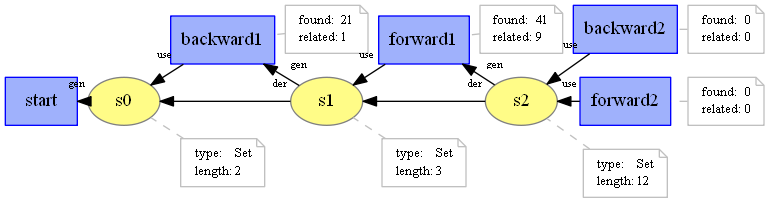

In [17]:
from IPython.display import Image
Image("output/snowballing.png")

In [12]:
log

[Step(name='start', new_references=2, new_related=2, total_visited=2, total_related=2),
 Step(name='backward', new_references=21, new_related=1, total_visited=23, total_related=3),
 Step(name='forward', new_references=41, new_related=9, total_visited=64, total_related=12),
 Step(name='backward', new_references=0, new_related=0, total_visited=64, total_related=12),
 Step(name='forward', new_references=0, new_related=0, total_visited=64, total_related=12)]

In [ ]:
len([x for _, x in load_work_map_all_years() if x.category in ('snowball','ok','backward')])

In [ ]:
from fractions import Fraction
for step in log:
    print("precision", Fraction(step.new_related, step.new_references))

In [ ]:
len([x for x in visited if x.category in {"snowball"}])

In [ ]:
from snowballing.approaches import get_approaches
len(get_approaches())

In [ ]:
len([(x, x.year) for x in visited
     if x.category in {"nofile"}
     if x.place.name != "Tech Report"
     if x.place.name != "Book"
     if x.place.name != "Patent"
     if x.place.name == "Conference"
     if x.display != x.place.acronym
    ])
#count = 0
#for x in visited:
#     if hasattr(x, 'dglibrary'):
#        print(x.dglibrary)
#        count = 1 + count
#print (count)
len([
    (x, x.year) for x in visited
     if hasattr(x, 'dglibrary') and x.dglibrary=="Scopus"
    
])

def count_ref(library,obj):
    len_dglibrary = len([(x, x.year) for x in obj
                             if hasattr(x, 'dglibrary') and library in x.dglibrary  
                        ])
    len_backward = len([(x, x.year) for x in obj
                             if x.category=="backward"  
                        ])
    len_forward = len([(x, x.year) for x in obj
                             if x.category=="forward"  
                        ])
    qtdref=0
    qtdcitations=0
    for x in obj:
        qtdref=qtdref + int(getattr(x, "references", 0))
        
    scopus = sum(int(getattr(x, "scopus", 0)) for x in obj)
            
    for x in obj:
        qtdcitations=qtdcitations + int(getattr(x, "citations", 0))
    return len_dglibrary,qtdref,qtdcitations,len_backward,len_forward
     

print ("Digital Library, Referencias, Citações, Qtd Backward, Qtd Forward")
print(count_ref("Scopus",visited))

log

print (log[0].name, log[0].new_references)
print(log[1].name, log[1].new_references)
print(log[2].name, log[2].new_references)
print(log[3].name, log[3].new_references)
print("visitados", len(visited))

In [ ]:
len([x for x in visited if x.category in {"lang"}])

In [ ]:
len([x for x in visited if x.category in {"site"}])

In [ ]:
len([x for x in visited
     if x.place.name == "Tech Report"
    ])

In [ ]:
len([x for x in visited
     if x.place.name == "ESEM"
    ])

In [ ]:
{x.category for x in visited}

In [ ]:
[(x.year, x.authors, x.name, x.place.name, x.request) for x in visited
 if x.category in {"nofile"}
 if x.place.name != "Tech Report"
 if x.place.name != "Book"
 if x.place.name != "Patent"
 if x.display != x.place.acronym]

In [ ]:
len(_)